# eigenstrat format dataset

## The data

Now, everything is running. Let's first get our genetic data! We will look at a dataset with 104 populations (total of 198 individuals), with data for 1.24 million positions across the human genome.

First, open a terminal, so we get some data:

```
mkdir ~/notebooks/admixtools/data
cd ~/notebooks/admixtools/data

wget https://ucloud.univie.ac.at/index.php/s/fYNi6xXR83R1YEc/download
tar -zxvf download
```

Let's have a look at the top few lines of each file to understand what is inside:

    head dataset.ind

    head dataset.snp

Check the length of each of those files, which tell us how many individuals and how many SNPs are in the dataset:

```
wc -l dataset.ind
wc -l dataset.snp
```

The "dataset.geno" file is in binary format and therefore can't be visualised as text, but it contains the genotype information for each individual, for each 1.24 million positions.

A total of 74 modern populations from all across the world are included, and 28 ancient individuals, including some archaic hominins:

```
    Altai_Neanderthal.DG
    Chagyrskaya_Neandert.SG
    Denisova.DG
    etc
```

## How to get to this format from a VCF file?
In principle, this can be done with bcftools and standard bash commands (see https://github.com/bodkan/vcf2eigenstrat/blob/master/conversion.sh). There are a couple of scrips around. For example, you may use the gdc repository (by `git clone https://github.com/mathii/gdc.git`) & the included python script vcf2eigenstrat for conversion (e.g. `python2 ~/gdc/vcf2eigenstrat.py -v [...] -o [...] -i [...]`).

## Admixtools package

These files are often interpreted with admixtools. To make life easier, we will use admixtools in R, which provides the same and more functionalities as the usual command line tools.

You may use RStudio or call R from the command line, and load the package.

```
R --vanilla
library(admixtools)
library(dplyr)
options(scipen=100)
```


## f4-statistics 

f4-statistics can be used to investigate allele sharing between populations, a classical marker of admixture. They are very similar to D-statistics (ABBA/BABA).

![image.png](attachment:5c3cd601-3083-460f-bc30-354f571afa81.png)

![image.png](attachment:09f023d9-234b-4c58-bbc0-9b30cf16f7ab.png)

For example if modern non-Africans (X) shared more alleles with Neanderthals than Africans:

```
f4(Yoruba, X; Neanderthal, Chimpanzee)
f4 > 0      X closer to Denisovan than to Neanderthal
f4 < 0      X closer to Neanderthal than to Denisovan
```

Or if a modern population (X) shared more alleles with Neanderthals than Denisovans.

```
f4(Yoruba, X; Neanderthal, Denisovan)
f4 > 0      X closer to Denisovan than to Neanderthal
f4 < 0      X closer to Neanderthal than to Denisovan
```


## f4 in admixtools

Now, the first step is to calculate the basic statistics. In order to do it within the Binder framework (large data), we need to restrict it to some individuals.

There is a command to do this:

```
extract_f2(pref="dataset",
    outdir="genos",blgsize=500000,
    overwrite=T,maxmem=500,
    pops=c("Altai_Neanderthal.DG","Denisova.DG", "Finnish.DG", "Japanese.DG","Mbuti.DG", "Papuan.DG","Yoruba.DG","Chimp.REF"))
```

This function will calculate pairwise statistics only for the samples in question, and write these into new files. Nothing much to see here, though you may inspect the new directory "genos" with some binary files.

Now we load that into R:

```
f2_blocks = f2_from_precomp("genos")
```

This is a complex table with the basic statistics we need. But we want to focus on f4-statistics to see if there was admixture between some populations. So, we calculate f4-statistics.

First, let's check the f4-stats for Neanderthal introgression:

```
f4_table1<-f4(f2_blocks,pop1="Yoruba.DG", pop2=c("Finnish.DG", "Japanese.DG","Mbuti.DG", "Papuan.DG"),pop3="Altai_Neanderthal.DG", pop4="Chimp.REF")
```

What do we see here?

```
f4_table2<-f4(f2_blocks,pop1="Yoruba.DG", pop2=c("Finnish.DG", "Japanese.DG","Mbuti.DG", "Papuan.DG"),pop3="Altai_Neanderthal.DG", pop4="Denisova.DG")
```

And now look at Denisovan ancestry only:
```
f4_table3<-f4(f2_blocks,pop1="Papuan.DG", pop2=c("Finnish.DG", "Yoruba.DG","Mbuti.DG", "Japanese.DG"),pop3="Denisova.DG", pop4="Chimp.REF")
f4_table4<-f4(f2_blocks,pop1="Japanese.DG", pop2=c("Finnish.DG", "Yoruba.DG","Mbuti.DG", "Papuan.DG"),pop3="Denisova.DG", pop4="Chimp.REF")
```


## Limits of f4

There are limits of detection, some events cannot be found with f4-statistics.

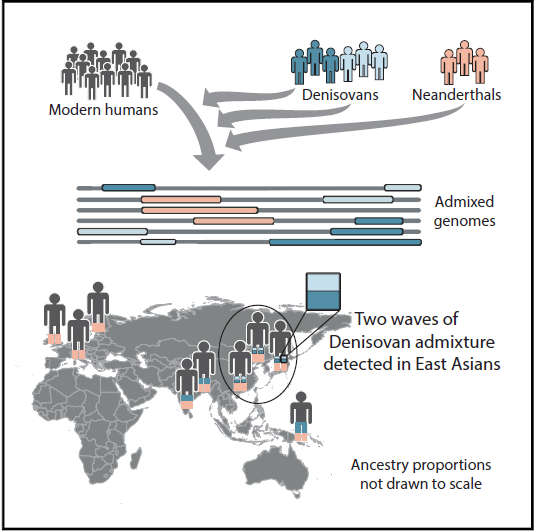

(Browning et al., 2018)

To understand the caveats and limitations of f-statistics and these tools (and become more critical of typical aDNA papers), one may study the (extensive) documentation:

https://uqrmaie1.github.io/admixtools/index.html

Screening the genome for introgressed fragments is a solution (last session).
